## Resnet101 muti sz

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import os,shutil

# Fastai reloads
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#Impost fastai
from fastai.vision import *
from fastai.metrics import error_rate,accuracy
from fastai.callbacks import *
from fastai.imports import *
from fastai.callbacks.mem import PeakMemMetric

from pathlib import Path

from torchvision.models import *
from torch.nn import CrossEntropyLoss
import cv2
#import pretrainedmodels

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
import seaborn as sns

In [3]:
PATH=Path('data/')

## Create Data block (Try with 1/4 size)

In [4]:
tfms=get_transforms(max_rotate=20,max_zoom=1.3,p_lighting=.8,
                    xtra_tfms=[cutout(n_holes=(1,4), length=(5, 10), p=.75), jitter(magnitude=0.005, p=.25)])

In [5]:
img=open_image(PATH/'train_resized_210'/os.listdir(PATH/'train_resized_210')[1])

In [6]:
img.shape

torch.Size([3, 210, 210])

In [7]:
src_size=np.array(img.shape[1:]);src_size

array([210, 210])

In [8]:
np.random.seed(42)
src = (ImageList.from_csv(PATH, 'train.csv', folder='train_resized_210')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' ')
      .add_test_folder('test_resized_210'))

In [9]:
data = (src.transform(tfms, size=src_size//4)
        .databunch(bs=256).normalize(imagenet_stats))        

In [10]:
data.classes

['1', '2', '3', '4', '5']

In [11]:
data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: EmptyLabelList
,,,,
Path: data

## Try with ResNET 101

In [10]:
metrics_custom=[fbeta,accuracy_thresh]

In [11]:
learn=cnn_learner(data,models.resnet101,metrics=metrics_custom)

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


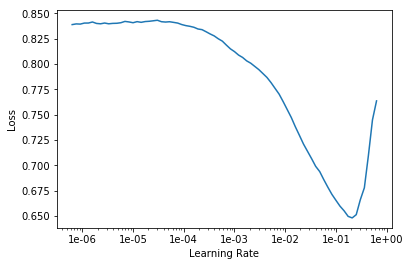

In [15]:
learn.recorder.plot()

In [16]:
lr=2e-2

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.745215,0.589600,0.584817,0.701760,00:05
1,0.651744,0.436855,0.639660,0.817760,00:05
2,0.545364,0.390068,0.617471,0.835200,00:05
3,0.474794,0.362006,0.679719,0.849280,00:05
4,0.423888,0.322821,0.718286,0.865920,00:05
5,0.385289,0.304731,0.742767,0.872480,00:05
6,0.353195,0.292630,0.770324,0.877600,00:05
7,0.325696,0.265487,0.777981,0.892320,00:05
8,0.299956,0.250716,0.791695,0.895520,00:05
9,0.280054,0.324157,0.766648,0.886400,00:05


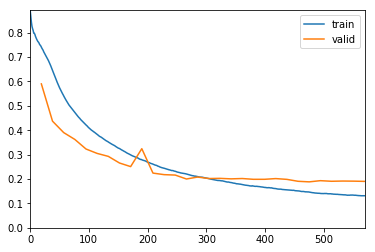

In [17]:
learn.fit_one_cycle(30,slice(lr),wd=1e-3,callbacks=ShowGraph(learn))

In [18]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


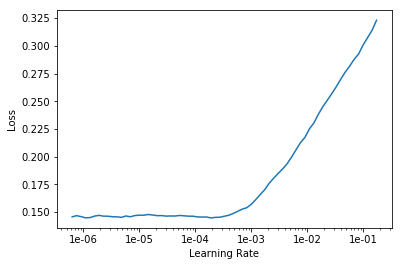

In [21]:
learn.recorder.plot()

In [19]:
lr=4e-5

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.132047,0.196312,0.853467,0.925920,00:06
1,0.136622,0.217697,0.839790,0.921120,00:05
2,0.132172,0.214781,0.852362,0.920000,00:05
3,0.124471,0.183819,0.860057,0.930400,00:05
4,0.114140,0.181426,0.865562,0.930880,00:05


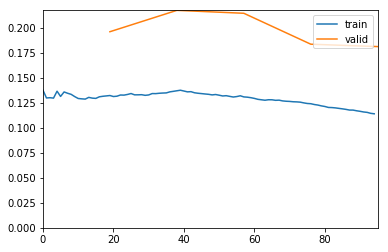

In [20]:
learn.fit_one_cycle(5,slice(lr,2e-4),callbacks=ShowGraph(learn))

In [21]:
learn.save('resnet-101-imagenet-onefrth-stage-2-img210')

In [22]:
learn.load('resnet-101-imagenet-onefrth-stage-2-img210')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
       

## Pass 1/3rd size

In [23]:
data = (src.transform(tfms, size=src_size//3)
        .databunch(bs=512).normalize(imagenet_stats))  

In [24]:
learn.data=data

In [25]:
learn.freeze()

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


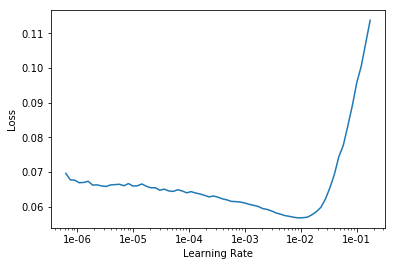

In [32]:
learn.recorder.plot()

In [26]:
lr=2e-3

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.121049,0.175794,0.865581,0.933120,00:12
1,0.117817,0.169838,0.864381,0.933280,00:07
2,0.113573,0.170771,0.864781,0.933760,00:07
3,0.110020,0.170206,0.866610,0.934560,00:07
4,0.107817,0.168946,0.866781,0.934080,00:07


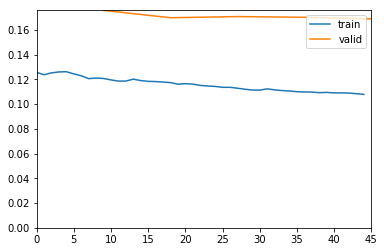

In [27]:
learn.fit_one_cycle(5,max_lr=slice(lr),callbacks=ShowGraph(learn))

In [28]:
learn.save('resnet-101-imagenet-onethrd-stage-3-210')

In [29]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


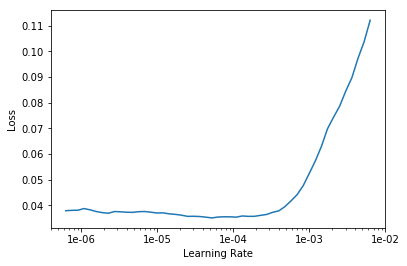

In [38]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.101929,0.167473,0.867886,0.935680,00:09
1,0.096726,0.154485,0.881733,0.936960,00:08
2,0.090175,0.147932,0.887467,0.941920,00:08
3,0.086470,0.147272,0.885714,0.942240,00:08


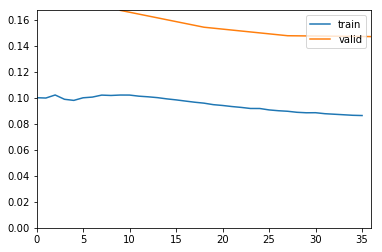

In [30]:
lr=2e-5
learn.fit_one_cycle(4,max_lr=slice(lr,2e-4),callbacks=ShowGraph(learn))

In [31]:
learn.save('resnet-101-imagenet-onethrd-stage-4-210')

In [32]:
learn.load('resnet-101-imagenet-onethrd-stage-4-210')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70),Image (3, 70, 70)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
       

## Pass half size

In [33]:
data = (src.transform(tfms, size=src_size//2)
        .databunch(bs=256).normalize(imagenet_stats))

In [35]:
learn.data=data
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


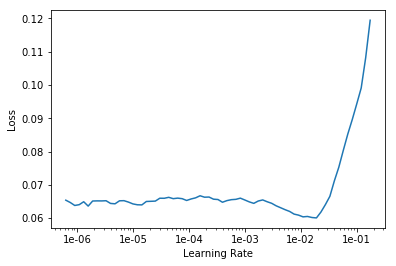

In [16]:
#learn.freeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.115326,0.149418,0.894210,0.942720,00:11
1,0.109726,0.143961,0.892610,0.945920,00:08
2,0.102512,0.140385,0.895867,0.947680,00:08
3,0.098130,0.140283,0.892381,0.948960,00:08
4,0.091707,0.141688,0.894571,0.947840,00:08
5,0.086923,0.142563,0.891143,0.947680,00:08
6,0.082638,0.141314,0.893905,0.948320,00:08
7,0.080274,0.139769,0.896172,0.949280,00:08


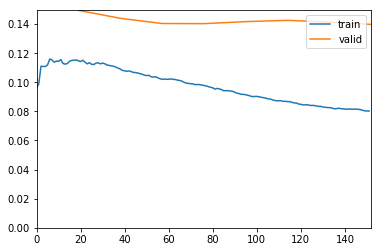

In [36]:
lr=2e-3
learn.fit_one_cycle(8,max_lr=slice(lr),wd=1e-3,callbacks=ShowGraph(learn))

In [37]:
learn.save('resnet-101-imagenet-half-stage-5-210')

In [38]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


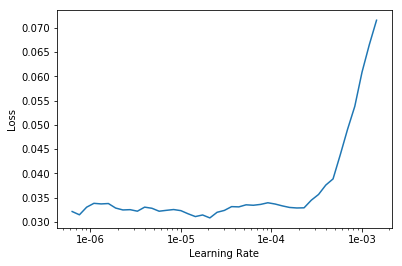

In [20]:
#learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.076790,0.148761,0.889809,0.945760,00:11
1,0.071830,0.154090,0.886648,0.942560,00:10
2,0.064628,0.130531,0.904610,0.950240,00:10
3,0.056002,0.138578,0.901257,0.951840,00:10
4,0.048104,0.129275,0.906552,0.954720,00:10


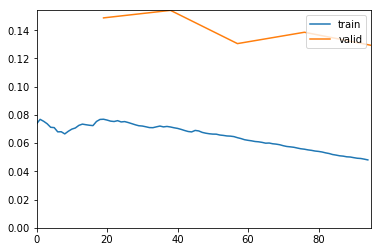

In [39]:
lr=2e-6
learn.fit_one_cycle(5,max_lr=slice(lr,2e-3),callbacks=ShowGraph(learn))

In [40]:
learn.save('resnet-101-imagenet-half-stage-6-210')

In [13]:
learn.load('resnet-101-imagenet-half-stage-6-210')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52),Image (3, 52, 52)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
       

## Pass full size image

In [12]:
data = (src.transform(tfms, size=src_size)
        .databunch(bs=64).normalize(imagenet_stats))

In [13]:
learn.data=data

In [14]:
learn.freeze()

In [52]:
learn.data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: EmptyLabelList
,,,,
Path: data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


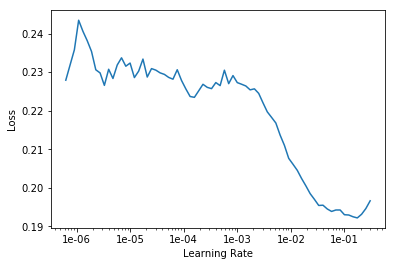

In [53]:
#learn.load('resnet-5-imagenet-half-stage-6-210')
learn.freeze()
learn.data=data
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.131185,0.125288,0.904210,0.949440,00:25
1,0.091883,0.117071,0.910667,0.957440,00:23
2,0.083580,0.112997,0.915733,0.957120,00:23
3,0.067113,0.109116,0.919333,0.961920,00:22
4,0.060223,0.098961,0.925352,0.962400,00:22
5,0.045918,0.095262,0.933238,0.968320,00:23
6,0.040190,0.095330,0.938667,0.968480,00:22
7,0.028854,0.090051,0.940533,0.970560,00:22
8,0.024265,0.092954,0.937867,0.969440,00:22
9,0.024214,0.099056,0.936267,0.970240,00:22


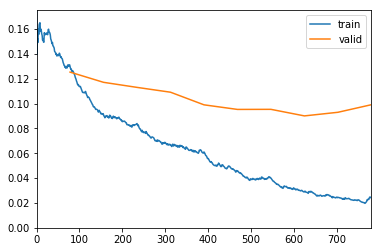

In [17]:
lr=1e-2
learn.fit_one_cycle(10,slice(lr),wd=1e-3,callbacks=ShowGraph(learn))

In [18]:
learn.save('resnet-34-imagenet-full-stage-7-210')

In [15]:
learn.load('resnet-34-imagenet-full-stage-7-210')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stri

In [16]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


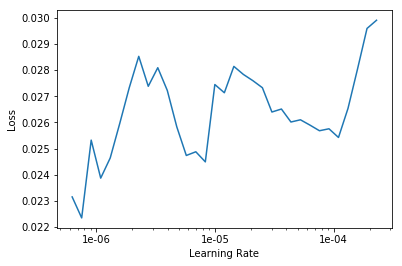

In [17]:
#learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.021712,0.096041,0.938000,0.969440,00:31
1,0.024602,0.096496,0.938000,0.970880,00:30
2,0.022584,0.097036,0.935333,0.969760,00:30
3,0.019948,0.093262,0.939867,0.970240,00:30
4,0.020074,0.096817,0.938667,0.970400,00:30


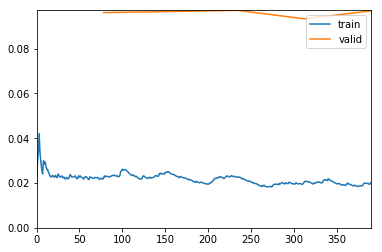

In [18]:
lr=1e-7
learn.fit_one_cycle(5,max_lr=slice(lr,9e-7),callbacks=ShowGraph(learn))

In [19]:
learn.save('resnet-101-imagenet-full-stage-8-210')

In [65]:
test_pred_tta=learn.TTA(ds_type=DatasetType.Test)

In [66]:
test_pred_tta

(tensor([[8.9897e-01, 4.7270e-03, 2.2101e-02, 2.3031e-02, 5.4112e-02],
         [3.6070e-05, 5.6036e-03, 9.9925e-01, 2.5516e-05, 4.1546e-04],
         [7.3554e-01, 6.7603e-02, 1.7947e-03, 1.3406e-01, 7.4781e-02],
         ...,
         [6.4527e-03, 4.8068e-02, 8.6049e-01, 2.6847e-04, 7.2635e-02],
         [1.8205e-02, 9.7401e-01, 8.2595e-04, 4.9619e-03, 2.5159e-03],
         [9.9007e-01, 1.4970e-04, 4.0416e-04, 4.2536e-05, 8.3819e-03]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]))

In [67]:
preds = np.argmax(test_pred_tta[0], 1)
preds

tensor([0, 2, 0,  ..., 2, 1, 0])

In [68]:
a=array(preds)

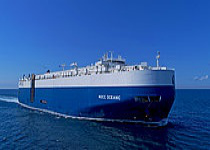

In [69]:
data.test_ds.x[1]

In [70]:
test_img_names = [Path(i).name for i in learn.data.test_ds.x.items]

In [71]:
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.head(10)

,image,category
0,2904735.jpg,1
1,2890616.jpg,3
2,2902677.jpg,1
3,2741468.jpg,4
4,2802610.jpg,5
5,1630950.jpg,4
6,2882184.jpg,3
7,2787793.jpg,2
8,2866032.jpg,1
9,2369442.jpg,2


In [72]:
len(submission)

2680

In [73]:
submission.to_csv(PATH/'submission_resnet34_multisz-210.csv',index=False)

## Merge the validation set

In [30]:
np.random.seed(42)
src = (ImageList.from_csv(PATH, 'train.csv', folder='train_resized')
       .split_by_rand_pct(.001)
       .label_from_df(label_delim=' ')
      .add_test_folder('test_resized'))

In [31]:
data = (src.transform(tfms, size=src_size)
        .databunch(bs=64).normalize(imagenet_stats))

In [32]:
data

ImageDataBunch;

Train: LabelList (6246 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (6 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: EmptyLabelList
,,,,
Path: data

In [33]:
learn.load('resnet-101-imagenet-full-stage-8-210')

Learner(data=ImageDataBunch;

Train: LabelList (6252 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (0 items)
x: ImageList

y: MultiCategoryList

Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [34]:
learn.data=data

In [35]:
learn.data

ImageDataBunch;

Train: LabelList (6246 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (6 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: EmptyLabelList
,,,,
Path: data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


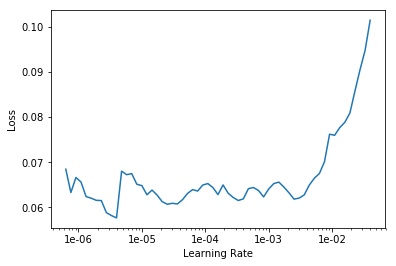

In [36]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,time
0,0.065485,0.824348,0.500000,0.800000,00:26
1,0.073515,0.898440,0.500000,0.800000,00:25
2,0.071140,0.906603,0.500000,0.800000,00:25
3,0.067976,0.911685,0.500000,0.800000,00:25
4,0.064411,0.949234,0.500000,0.800000,00:25
5,0.070803,0.917153,0.500000,0.800000,00:25
6,0.064357,0.809187,0.500000,0.800000,00:25
7,0.061189,0.867954,0.500000,0.800000,00:25


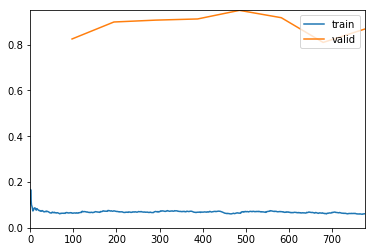

In [37]:
lr=3e-7
learn.fit_one_cycle(8,max_lr=slice(lr),callbacks=ShowGraph(learn))

In [38]:
learn.save('resnet-101-imagenet-full-stage-8-210-noval')

In [39]:
test_pred_tta=learn.TTA(ds_type=DatasetType.Test)

In [41]:
test_img_names = [Path(i).name for i in learn.data.test_ds.x.items]
preds = np.argmax(test_pred_tta[0], 1)
a=array(preds)
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.to_csv(PATH/'submission_resnet101_multisz-noval.csv',index=False)